In [3]:
import numpy as np
import pandas as pd
import math
from sisModel import SiSModel
from matplotlib import pyplot as plt
import astropy as ast
from astropy.io import fits
from astropy.visualization import astropy_mpl_style

a = np.array([[1, 2], [3, 4]])
b = np.array([[1, 2], [3, 4]])
np.sqrt(a**2+b**2)

array([[1.41421356, 2.82842712],
       [4.24264069, 5.65685425]])

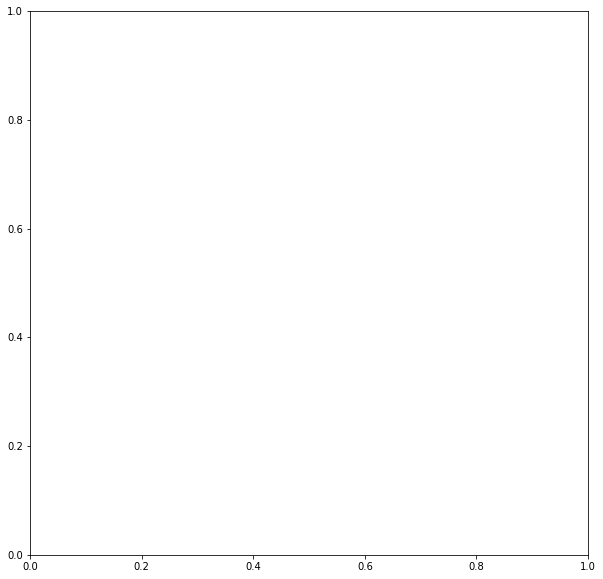

Signature:
ax.scatter(
    x,
    y,
    s=None,
    c=None,
    marker=None,
    cmap=None,
    norm=None,
    vmin=None,
    vmax=None,
    alpha=None,
    linewidths=None,
    *,
    edgecolors=None,
    plotnonfinite=False,
    data=None,
    **kwargs,
)
Docstring:
A scatter plot of *y* vs. *x* with varying marker size and/or color.

Parameters
----------
x, y : float or array-like, shape (n, )
    The data positions.

s : float or array-like, shape (n, ), optional
    The marker size in points**2 (typographic points are 1/72 in.).
    Default is ``rcParams['lines.markersize'] ** 2``.

c : array-like or list of colors or color, optional
    The marker colors. Possible values:

    - A scalar or sequence of n numbers to be mapped to colors using
      *cmap* and *norm*.
    - A 2D array in which the rows are RGB or RGBA.
    - A sequence of colors of length n.
    - A single color format string.

    Note that *c* should not be a single numeric RGB or RGBA sequence
    because that 

In [10]:
fig, ax = plt.subplots(figsize=(10,10))
ax.scatter?

In [6]:
x, y = np.meshgrid( np.linspace(-400,400,501), 
                               np.linspace(-400,400,501) )
z = np.full(np.shape(x),0.0)
z

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [7]:
d  = np.sqrt(x**2+y**2+z**2)


In [8]:
bicone_coords = (x,y,z)

In [9]:
bicone_coords

(array([[-400. , -398.4, -396.8, ...,  396.8,  398.4,  400. ],
        [-400. , -398.4, -396.8, ...,  396.8,  398.4,  400. ],
        [-400. , -398.4, -396.8, ...,  396.8,  398.4,  400. ],
        ...,
        [-400. , -398.4, -396.8, ...,  396.8,  398.4,  400. ],
        [-400. , -398.4, -396.8, ...,  396.8,  398.4,  400. ],
        [-400. , -398.4, -396.8, ...,  396.8,  398.4,  400. ]]),
 array([[-400. , -400. , -400. , ..., -400. , -400. , -400. ],
        [-398.4, -398.4, -398.4, ..., -398.4, -398.4, -398.4],
        [-396.8, -396.8, -396.8, ..., -396.8, -396.8, -396.8],
        ...,
        [ 396.8,  396.8,  396.8, ...,  396.8,  396.8,  396.8],
        [ 398.4,  398.4,  398.4, ...,  398.4,  398.4,  398.4],
        [ 400. ,  400. ,  400. , ...,  400. ,  400. ,  400. ]]),
 array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
      

In [10]:
bicone_grid = np.zeros(len(d))

In [11]:
bicone_grid


array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [13]:
from scipy.interpolate import griddata


In [14]:
zip(x,y,z)

In [1]:
import numpy as np
import pandas as pd
import math
from sisModel import SiSModel
from matplotlib import pyplot as plt
import astropy as ast
from astropy.io import fits

In [2]:
def sky_to_outflow(x, y, z):
        x_prime, y_prime, z_prime = self.sky_to_prime(x, y, z)
        r, phi, z_prime = self.prime_to_outflow(x_prime, y_prime, z_prime)
        return r, phi, z_prime
def velocity_model_field(r, phi, zprime):
    
        mask = (r > self.r_inner(zprime)) & (r < self.r_outer(zprime))
        vr = np.where(mask, self.v_radial * self.v_radial_dropoff(zprime), np.nan)

        # Azimuthal rotation of vphi0 next to disk, drops linearly to 0 at height z_no_rotation #
        vphi = np.where(np.abs(zprime) < self.z_no_rotation, self.v_phi0 * self.v_phi_dropoff(zprime), 0.)
        vphi = np.where(mask, vphi, np.nan)
        
        # Flows away from disk at constant velocity vz0
        vz = np.where(zprime > 0., self.vz_0 * self.v_z_dropoff(zprime), -self.vz_0 * self.v_z_dropoff(zprime))
        vz = np.where(mask, vz, np.nan)
        
                      
        vx, vy, vz = self.outflow_to_sky_velocity(phi, vr, vphi, vz)
        
        vx = self.add_random_velocity_component(vx)
        vy = self.add_random_velocity_component(vy)
        vz = self.add_random_velocity_component(vz)
        
        
        return vx, vy, vz

    

In [63]:
x, y = np.meshgrid( np.linspace(-10,10,10), 
                np.linspace(-10,10,10) )
                # using 240 AU x 240 AU slices for this example
                # possible addition to the code is to check that outflow fits within the slice
xm, ym = x.ravel(), y.ravel()
zm =np.full(np.shape(xm), 0.0)
d  = np.sqrt(xm**2+ym**2+zm**2)
bicone_grid = np.full(np.shape(d), 0.0)

dust_plane_radius = 2* 5

x_dust_grid, y_dust_grid = np.meshgrid(np.linspace(-dust_plane_radius, dust_plane_radius, 10),
                           np.linspace(-dust_plane_radius, dust_plane_radius, 10))
z_dust_grid = np.full(np.shape(x_dust_grid), 0.0)
distance = np.sqrt(x_dust_grid**2+y_dust_grid**2)

x_dust, y_dust, z_dust = x_dust_grid.ravel(), y_dust_grid.ravel(), z_dust_grid.ravel()
x_dust = x_dust_grid[distance<=dust_plane_radius]
y_dust = y_dust_grid[distance<=dust_plane_radius]
z_dust = z_dust_grid
[distance<=dust_plane_radius]
model_coords = (xm, ym, zm)
dust_coords = (x_dust, y_dust, z_dust)
print(zip(dust_coords))
zip(dust_coords)

In [39]:
np.reshape?

Signature: np.reshape(a, newshape, order='C')
Docstring:
Gives a new shape to an array without changing its data.

Parameters
----------
a : array_like
    Array to be reshaped.
newshape : int or tuple of ints
    The new shape should be compatible with the original shape. If
    an integer, then the result will be a 1-D array of that length.
    One shape dimension can be -1. In this case, the value is
    inferred from the length of the array and remaining dimensions.
order : {'C', 'F', 'A'}, optional
    Read the elements of `a` using this index order, and place the
    elements into the reshaped array using this index order.  'C'
    means to read / write the elements using C-like index order,
    with the last axis index changing fastest, back to the first
    axis index changing slowest. 'F' means to read / write the
    elements using Fortran-like index order, with the first index
    changing fastest, and the last index changing slowest. Note that
    the 'C' and 'F' options ta

In [64]:
ax.contourf?

Object `ax.contourf` not found.


In [ ]:

        #Radius of dust plane. The radius on the RHS is r0 outer.
        dust_plane_radius = 2*radius
        
        #Generating dust plane grid 
        
        x_dust_grid, y_dust_grid = np.meshgrid(np.linspace(-dust_plane_radius, dust_plane_radius, 501),
                           np.linspace(-dust_plane_radius, dust_plane_radius, 501))
        z_dust_grid = np.full(np.shape(x_dust_grid), 0.0)
        
        distance = np.sqrt(x_dust_grid**2+y_dust_grid**2)
        
        
        x_dust = x_dust_grid[distance<=dust_plane_radius]
        y_dust = y_dust_grid[distance<=dust_plane_radius]
        z_dust = z_dust_grid[distance<=dust_plane_radius]
        
        model_coords = (x, y, z)
        dust_coords = (x_dust, y_dust, z_dust)
        
        
        points = zip(x,y,z)
        values = bicone_grid
        print(z)
        new_model_grid = griddata(np.array(points), np.array(values), np.array(zip(x, y, z)), method='nearest')
        ###Generate flux grid
        dust_velocity = dust_velocity_profile(new_model_grid, model_coords,vmax=vmax, D=1.0,  vtype='decreasing')
        
        z_dust_grid = griddata ((x_dust, y_dust), z_dust, (x_dust_grid, y_dust_grid), method='cubic')
        
        return dust_velocity, x_dust_grid, y_dust_grid, z_dust_grid
        

In [16]:
np.full?

Signature: np.full(shape, fill_value, dtype=None, order='C', *, like=None)
Docstring:
Return a new array of given shape and type, filled with `fill_value`.

Parameters
----------
shape : int or sequence of ints
    Shape of the new array, e.g., ``(2, 3)`` or ``2``.
fill_value : scalar or array_like
    Fill value.
dtype : data-type, optional
    The desired data-type for the array  The default, None, means
     ``np.array(fill_value).dtype``.
order : {'C', 'F'}, optional
    Whether to store multidimensional data in C- or Fortran-contiguous
    (row- or column-wise) order in memory.
like : array_like
    Reference object to allow the creation of arrays which are not
    NumPy arrays. If an array-like passed in as ``like`` supports
    the ``__array_function__`` protocol, the result will be defined
    by it. In this case, it ensures the creation of an array object
    compatible with that passed in via this argument.

    .. versionadded:: 1.20.0

Returns
-------
out : ndarray
    Arra

In [ ]:
if np.any(zprime<0):
                v_y_adj = -vy + SiSModel.v_lsr
            else:
                v_y_adj = vy + SiSModel.v_lsr

                # add the source VLSR
            vlos=[]
            for i in range(0,len(x)) :
                vl,binedges = np.histogram(v_y_adj[:, i], range=(vmin, vmax), bins=nvbins)
                vlos.append(vl)                
                
            ax.imshow( vlos, origin='lower', aspect='auto', extent=(vmin, vmax, x[0,0], x[-1,-1]) )
            
            #dust_velocity, x_dust_grid, y_dust_grid, z_dust_grid = self.dust(self.r2_outer, x, y, z)
            #ax.contourf(x_dust_grid, y_dust_grid, z_dust_grid, cmap=cm.Oranges, alpha=0.5)
            ax.annotate("z = %.0f AU" % z, (.05, .9), xycoords="axes fraction", color='white')
    